# Outline : The Role of ENSO on Eastern Paicific Intertropical Convection Zone Characteristics

## Introduction 

The Eastern Pacific Intertropical Convection Zone (ITCZ) is a band of lower atmospheric convergence and convection which spans along the Earth's equator. It plays a large role in climatology and rainfall in Southern America. In this project, I will study the relation between the ITCZ (specifically the amount of rainfall within the ITCZ and its location and width) and ENSO events. Additionally, I will use ENSO events to make forecast on different characteristic of the ITCZ. 

## Background Material 

Within the Eastern Pacific, the ITCZ remains situated north to the equator, ranging around 5 - 15 $^{\circ}$ N [1]. However, the ITCZ's location fluctuates, mostly due to changes in SST [2]. The location and intensity of the Eastern Pacific ITZC plays a large role in local metoerology, and thus it would be interesting to understand the impact of seasonal ENSO events on the ITCZ. 

Reviews have been published on the correlation between El Nino/La Nina events and the SST and precipitation anomalies in the Eastern Pacific ITCZ [6]. In [5], linear regression analysis has been utilized to study the relationship between ENSO and ITCZ dynamics. Additionally, a similar study to basic correlations between the parameters listed above (SST anamolies, precipitation, and surface and upper PBL winds) and ENSO index was performed for the Atlantic ITCZ [3], which gives me a good frame to work off of.

## Scientific Questions 

ENSO drives sea surface temperatures in the Eastern Tropical Pacific. Due to the association between SST and ENSO events, and the relation between SST and ITCZ caracteristics, I would like to study the effect of ENSO on ITCZ location and precipiation. Therefore, first I would like to study the correlation between ENSO and ITCZ location and intensity and then try to understand how ENSO indices can be used to predict future characteristics of the ITCZ. 

## Data 

Classification of the ITZC has taken many forms. Since the main feautres of the ITCZ are bands of convection and converging PBL winds, I have classify the Eastern Pacific ITCZ by studying SST, preicpiation and meridional winds. For this project, I will be using the ENSO indices from IRI's data collection as well as NOAA's COBE SST data and CMAP precipiation data. Since satellite data doesn't have a long-time scale for meridional winds, I will be using ERA5's reanalysis to collect data on trade winds. Below, I've amassed a table which describes the datasets that I will be usin gin detail. 

| Description | Temporal Span | Temporal Resolution | Spatial Span | Spatial Resolution | Format | Source | 
| :---------: | :-----------: | :-----------------: | :----------: | :----------------: | :----: | :----: |
| ENSO Indices | Nov 1981 - Sep 2020 | Monthly | N/A | N/A | netCDF | IRI LDEO (http://iridl.ldeo.columbia.edu/SOURCES/.Indices/.nino/?Set-Language=en) | 
| SST | Jan 1981 - Present | Monthly | 89.5 N - 89.5 S, 0.5 E - 359.5 E | 1$^{\circ}$ lat $\times$ 1$^{\circ}$ lon | netCDF | NOAA COBE SST (https://psl.noaa.gov/data/gridded/data.cobe.html) | 
| Precipitation | Jan 1979 - Sep 2020 | Monthly | 88.75 N - 88.75 S, 1.25 E - 358.75 E | 2.5$^{\circ}$ lat $\times$ 2.5$^{\circ}$ lon | netCDF | NOAA CMAP (https://psl.noaa.gov/data/gridded/data.cmap.html) | 
| Winds (1000 hPa and 850 hPa) | Jan 1979 - Present | Monthly | N/A | 0.25$^{\circ}$ lat $\times$ 0.25$^{\circ}$ lon | GRIB | ERA 5 Reanalysis (https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=overview) |

## Methods 

First I will perfrom a correlation analysis, similar to what we have perfromed in previous homeworks, between ENSO indices and the variables that characterize the Eastern Pacific ITCZ (precipitation, SST, and meridional winds). After studying the correlation between ENSO indices, I will attempt to perform linear regression using each of these variables to make forecast on the future state of ITZC location and intensity.  

## Results 

Here, I will plot the SST, Precipitation and Surface Winds as a function of latitude and time in order to understand the general structure of the ITCZ over time. Below, you can find such a plot for precipitation, acquired from CMAP. Additionally, I will include forecast plots from linear regressions perfromed on the ENSO indeices and the Eastern Pacific SST, precipiation, and meridional winds. 

Text(0.5, 0, 'Time')

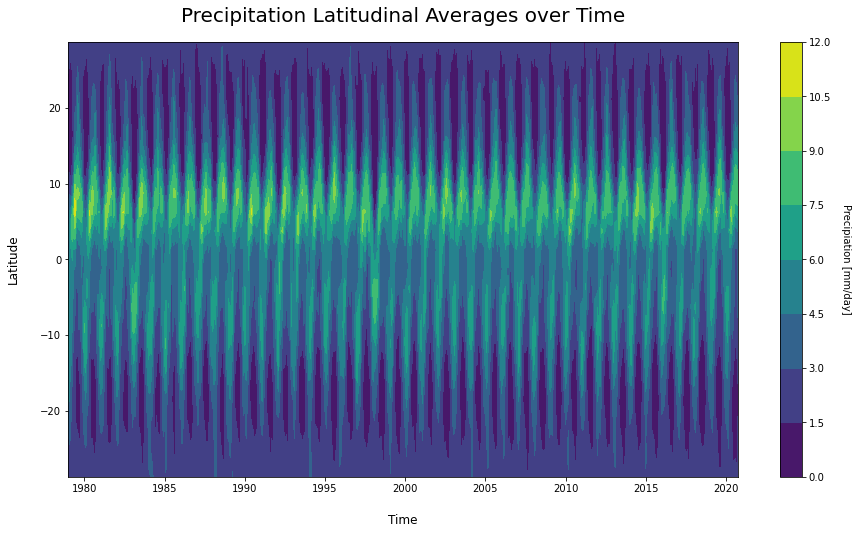

In [4]:
# Libraries 
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

# Read data into Dataframe 
precip_url = 'https://psl.noaa.gov/thredds/dodsC/Datasets/cmap/enh/precip.mon.mean.nc'
precip_ds = xr.open_dataset(precip_url)
precip_df = precip_ds.to_dataframe()
precip_df = precip_df.reset_index()

# Select values near equator: 
precip_df = precip_df[(precip_df.lat < 30) & (precip_df.lat > -30)]

# Average over Latitude and Time
precip_df = precip_df.groupby(['lat', 'time']).mean()

# Plotting Latitudinal Preciptation Averages over Time 
precip_df = precip_df.reset_index()
precip = precip_df.pivot_table(index='time', columns='lat', values='precip').T.values
lat_unique = np.sort(precip_df.lat.unique())
time_unique = np.sort(precip_df.time.unique())
time, lat = np.meshgrid(time_unique, lat_unique)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15, 8))

cs = ax.contourf(time, lat, precip, cmap = 'viridis', linestyles = 'dashed')
cbar = plt.colorbar(cs, ax = ax)
cbar.ax.set_ylabel('Precipiation [mm/day]', rotation=270, labelpad = 20)
ax.set_title('Precipitation Latitudinal Averages over Time', fontsize = 20, pad = 20)
ax.set_ylabel('Latitude', fontsize = 12, labelpad = 20)
ax.set_xlabel('Time', fontsize = 12, labelpad = 20)

## Conclusions

From my results, I will draw conclusions on the relation between ENSO events and the location and intensity of the Eastern Pacific ITCZ. I will also make so claims on the future state of the ITCZ using linear regression. 

## Bibliography  

[1] “ITCZ Breakdown and Its Upscale Impact on the Planetary-Scale Circulation over the Eastern Pacific in: Journal of Atmospheric Sciences Volume 74 Issue 12 (2017).” Accessed December 3, 2020. https://journals.ametsoc.org/view/journals/atsc/74/12/jas-d-17-0021.1.xml?tab_body=fulltext-display.

[2] M. A., Geography, and Geography B. A. “What Is the Intertropical Convergence Zone?” ThoughtCo. Accessed December 3, 2020. https://www.thoughtco.com/itcz-1434436.

[3] Münnich, Matthias, and J. Neelin. “Seasonal Influence of ENSO on the Atlantic ITCZ and Equatorial South America.” Geophysical Research Letters - GEOPHYS RES LETT 322 (November 16, 2005). https://doi.org/10.1029/2005GL023900.

[4] Raymond, David J. “Convection in the East Pacific Intertropical Convergence Zone.” Geophysical Research Letters 44, no. 1 (2017): 562–68. https://doi.org/10.1002/2016GL071554.

[5] Sulca, Juan, Ken Takahashi, Jhan-Carlo Espinoza, Mathias Vuille, and Waldo Lavado‐Casimiro. “Impacts of Different ENSO Flavors and Tropical Pacific Convection Variability (ITCZ, SPCZ) on Austral Summer Rainfall in South America, with a Focus on Peru.” International Journal of Climatology 38, no. 1 (2018): 420–35. https://doi.org/10.1002/joc.5185.

[6] Wang, Chunzai, and Paul C. Fiedler. “ENSO Variability and the Eastern Tropical Pacific: A Review.” Progress in Oceanography, A Review of Eastern Tropical Pacific Oceanography, 69, no. 2 (May 1, 2006): 239–66. https://doi.org/10.1016/j.pocean.2006.03.004.
